[View in Colaboratory](https://colab.research.google.com/github/anu0508/new-inning/blob/master/Assignment_titanic.ipynb)

In [0]:
import numpy as np
import io
import requests
import pandas as pd


In [4]:
from google.colab import files
uploaded= files.upload()



Saving event_calendar.csv to event_calendar.csv


In [0]:
import io

In [0]:
dataset= pd.read_csv(io.StringIO(uploaded['event_calendar.csv'].decode('utf-8')))

In [7]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
Url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
  

In [0]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [0]:
titanic = pd.read_csv(Url)

In [72]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
titanic.shape

(891, 12)

In [10]:
titanic.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Fortune, Miss. Alice Elizabeth",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [11]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
titanic.select_dtypes=='object'

False

In [39]:
for col in titanic.columns:
  if titanic[col].dtype=='object':
    
     print(col,'\t',titanic[col].dtype)

Name 	 object
Sex 	 object
Ticket 	 object
Cabin 	 object
Embarked 	 object


In [33]:
titanic['Survived'].dtype

dtype('int64')

In [75]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

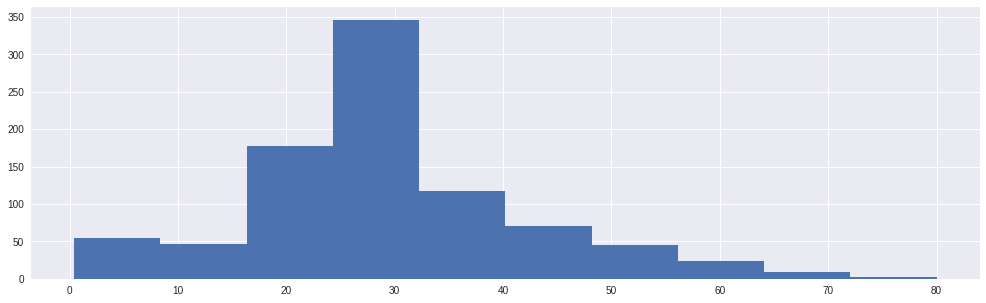

In [107]:
titanic.Age.fillna(value=titanic.Age.median(), inplace=True)
plt.figure(figsize=(17,5))
plt.hist(titanic['Age'])
plt.show()

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

In [60]:
titanic['Age'].max()

80.0

In [61]:
titanic['Age'].min()

0.42

In [63]:
titanic.Age.median(0)

28.0

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


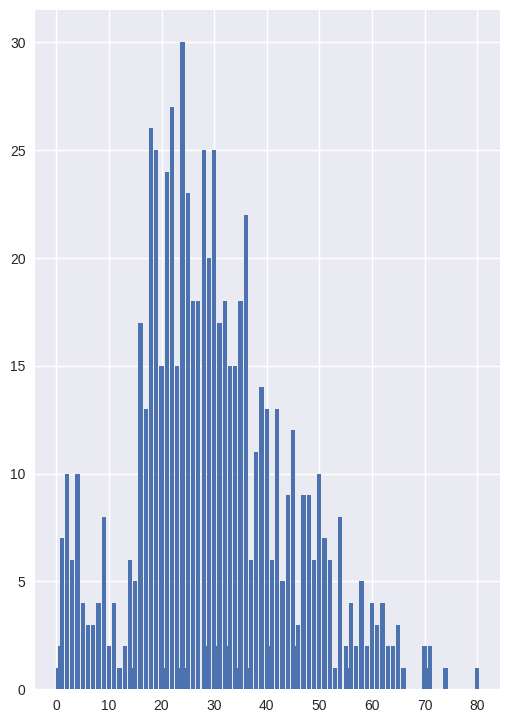

In [78]:
figure = plt.figure(figsize=(6,9), dpi=100);    
graph = figure.add_subplot(111);

freq = pd.value_counts(titanic['Age'])
bins = freq.index
x=graph.bar(bins, freq.values) #gives the graph without NaN


figure.show()

In [80]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

TypeError: ignored

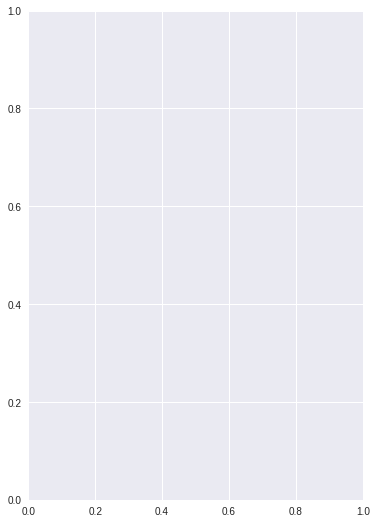

In [90]:
figure = plt.figure(figsize=(6,9));    
graph = figure.add_subplot(111);

temp = titanic['Cabin'].value_counts()
sizes=temp.values
labels = temp.index
x=graph.pie(sizes, labels)
plt.axis=True


figure.show()

In [0]:
sizes=temp.values
labels = temp.index

In [87]:
sizes

array([4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [88]:
labels

Index(['G6', 'C23 C25 C27', 'B96 B98', 'E101', 'F33', 'C22 C26', 'F2', 'D',
       'C126', 'F G73',
       ...
       'B41', 'A19', 'C32', 'E68', 'T', 'C111', 'D11', 'C62 C64', 'C87',
       'C91'],
      dtype='object', length=147)

In [0]:
#list1=[]
#for items in titanic['Cabin']:
 # print(items)
  #list1.append(items[0:1])
  

In [0]:
#lis=[]
#for item in titanic['Cabin']:
#  print(type(item))

In [0]:
titanic.drop(columns=['Name','PassengerId','Cabin'],axis=1,inplace=True)

In [110]:
#creating bin of Age column
bins = [0, 10, 20, 30, 40, 50, 60,80,100]
labels = [1,2,3,4,5,6,8,10]
titanic['binned'] = pd.cut(titanic['Age'], bins=bins, labels=labels)
print (titanic.head())

   Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0         0       3    male  22.0      1      0         A/5 21171   7.2500   
1         1       1  female  38.0      1      0          PC 17599  71.2833   
2         1       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3         1       1  female  35.0      1      0            113803  53.1000   
4         0       3    male  35.0      0      0            373450   8.0500   

  Embarked binned  
0        S      3  
1        C      4  
2        S      3  
3        S      4  
4        S      4  


In [0]:
titanic.rename(columns={'binned':'Age_Bin'},inplace= True)

In [0]:
### relation ship between survived and class of passenger



```
### relation ship between survived and class of passenger
```



In [116]:
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [117]:
titanic[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


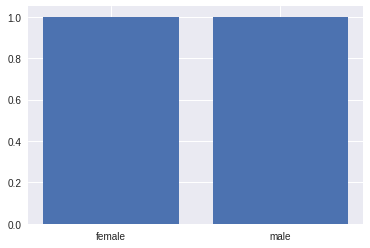

In [118]:
plt.bar(titanic['Sex'],titanic['Survived'])
plt.show()

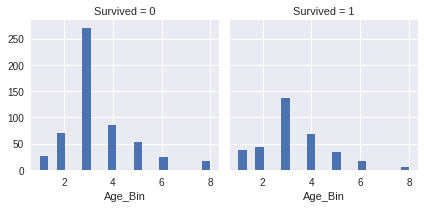

In [128]:
g = sb.FacetGrid(titanic, col='Survived')
g.map(plt.hist, 'Age_Bin', bins=20)


In [129]:
titanic.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Age_Bin'], dtype=object)

In [0]:
age_ticket=titanic.drop(columns=['Age','Ticket'],inplace=True,axis=1) #age and ticket column are dropped from the dataframe

In [131]:
titanic.columns.values

array(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Age_Bin'], dtype=object)

In [0]:
titanic.Embarked.fillna(value=titanic.Embarked.mode(), inplace=True) #two of null are converted to mode values of the column


In [0]:
classifier=LogisticRegression()

In [0]:
y=titanic.pop('Survived')
X=titanic

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
print("size of train_features",X_train.shape)
print("size of train_target",y_train.shape)

print("size of test_features",X_test.shape)

print("size of test_target",y_test.shape)



size of train_features (712, 7)
size of train_target (712,)
size of test_features (179, 7)
size of test_target (179,)


In [146]:
y_train.value_counts()

0    444
1    268
Name: Survived, dtype: int64

In [148]:
titanic.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Sex         2
Embarked    3
dtype: int64

In [0]:
titanic=pd.get_dummies(titanic)


In [150]:
titanic.columns

Index(['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age_Bin_1', 'Age_Bin_2',
       'Age_Bin_3', 'Age_Bin_4', 'Age_Bin_5', 'Age_Bin_6', 'Age_Bin_8',
       'Age_Bin_10'],
      dtype='object')

In [0]:
titanic=pd.get_dummies(titanic['Pclass'])


In [152]:
titanic.columns

Int64Index([1, 2, 3], dtype='int64')

In [153]:
titanic.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
